In [70]:
'''
CLUSTER ANALYSIS
How do we implement a k-means clustering algorithm?
scikit-learn KMeans documentation for reference:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
'''

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline


In [71]:
# ------------------------------------------
# EXERCISE: Compute the centoid of the following data
#           [2, 5], [4, 4], [3, 3]
# ------------------------------------------

d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)

In [72]:
# Import iris data
# Data Format as below
# Sepal-length  Sepal-width  Petal-length  Petal-width 
#  5.1           3.5           1.4           0.2          I. setosa

iris = datasets.load_iris()
print iris.feature_names
d = iris.data
np.random.seed(0)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [73]:
# Run KMeans
est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)
print y_kmeans

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


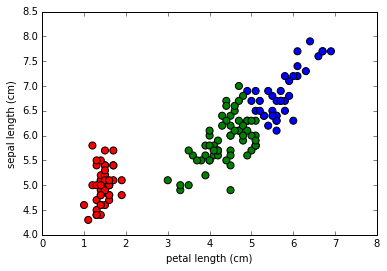

In [74]:
#colors = np.array(['#FF0054','#FBD039','#23C2BC'])
colors = np.array(['r','g','b'])
plt.figure()

# X-axis - Petal Length ,
# Y-axis - Sepal Length
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])


[[ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


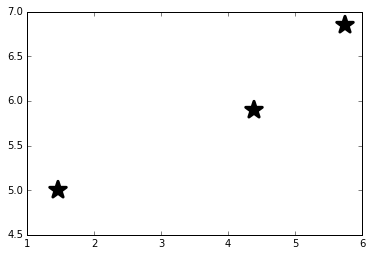

In [75]:
# ------------------------------------------
# Find the centers and plot them 
#           on the same graph.
# ------------------------------------------
centers = est.cluster_centers_
# We get 3 centres for 3 clusters corresponding to 3 Species
print centers
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='*', s=300)


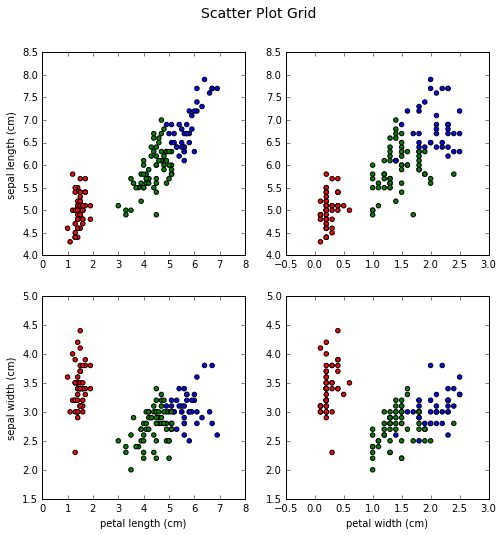

In [76]:
'''
VISUALIZING THE CLUSTERS
What are some different options to visualize 
multi-dimensional data? Let's look at three ways you can do this.
- Scatter Plot Grid
- 3D Plot
- Parallel Coordinates
'''

#================================
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)

# Upper Left
plt.subplot(221)   # GridTotalNoOfRows, GridTotalNoOfColumns, plot_position
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[0])

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])

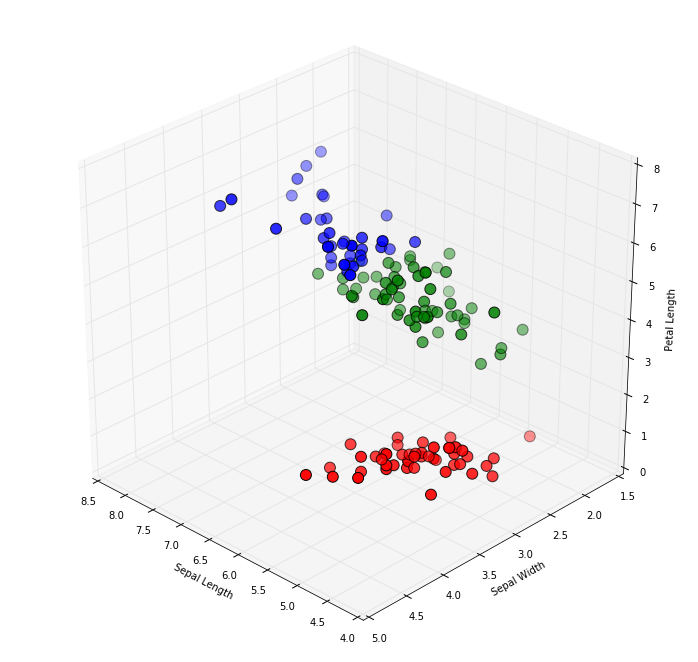

In [77]:
#================================
# Option #2: 3d plot

from mpl_toolkits.mplot3d import Axes3D

plt.suptitle('3d plot', fontsize=15)

ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)

#Below Simple code also works but plot is not very nice
#ax = Axes3D(plt.figure())
#ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
# Modified from the example here: 
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

In [78]:
'''
# !!!!! IGNORE THIS PORTION FOR NOW
#================================
# Option 3: Parallel Coordinates
#
from pandas.tools.plotting import parallel_coordinates
# I'm going to convert to a pandas dataframe
# Using a snippet of code we learned from one of Kevin's lectures!
features = [name[:-5].title().replace(' ', '') for name in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns = features)
iris_df['Name'] = iris.target_names[iris.target]
parallel_coordinates(data=iris_df, class_column='Name', 
                     colors=('#FF0054', '#FBD039', '#23C2BC'))
                     
'''

"\n# !!!!! IGNORE THIS PORTION FOR NOW\n#================================\n# Option 3: Parallel Coordinates\n#\nfrom pandas.tools.plotting import parallel_coordinates\n# I'm going to convert to a pandas dataframe\n# Using a snippet of code we learned from one of Kevin's lectures!\nfeatures = [name[:-5].title().replace(' ', '') for name in iris.feature_names]\niris_df = pd.DataFrame(iris.data, columns = features)\niris_df['Name'] = iris.target_names[iris.target]\nparallel_coordinates(data=iris_df, class_column='Name', \n                     colors=('#FF0054', '#FBD039', '#23C2BC'))\n                     \n"

In [79]:
'''
DETERMINING THE NUMBER OF CLUSTERS
How do you choose k? There isn't a bright line, but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.
scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
'''

# Create a bunch of different models i.e. Different no. of Clusters
k_rng = range(2,15)

silhouette_score = []
sum_of_squares = []

for k in k_rng:    
    est = KMeans(n_clusters=k)
    a = est.fit(d)

    # Silhouette score for this model
    sc = metrics.silhouette_score(d,a.labels_,metric='euclidean')
    silhouette_score.append(sc)
    
    # Sum of square of current model
    sos = est.inertia_
    sum_of_squares.append(sos)
    
    
print silhouette_score
print sum_of_squares

# Functional Style of generating est
#est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

[0.68081362027135073, 0.55259194452136762, 0.49722797262968005, 0.48851755085386322, 0.3682056965376459, 0.3561915588485427, 0.35530857366290824, 0.33138960366368203, 0.34176692796520153, 0.29609737759536631, 0.32228828269780196, 0.2848072812550666, 0.28257757450075532]
[152.368706477339, 78.940841426146079, 57.345409315718214, 46.535582051282091, 38.930963049671711, 34.460664331722974, 29.879919754370537, 28.030883195307101, 26.315580440777374, 24.735609723609745, 22.795916847041862, 21.5172450356661, 20.58317187387776]


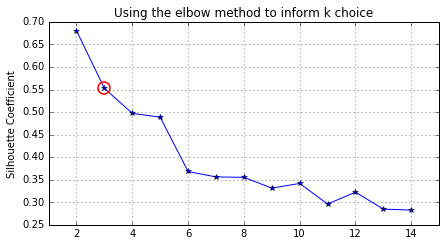

In [80]:
#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

# We calculated Silhouette Coefficient in above step and stored in List - silhouette_score

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')

plt.plot(k_rng, silhouette_score, 'b*-')

plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='red')

#Try below 
#plt.plot(3,silhouette_score[1], 'o')

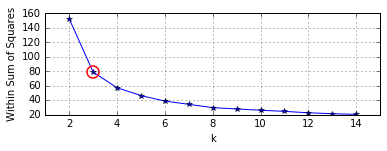

In [81]:
# -----------------------------------------------------
# EXERCISE: Calculate the within sum of squared errors 
#           and plot over a range of k
# -----------------------------------------------------


#================================
# Option 2: Within Sum of Squares (a.k.a., inertia)
# Generally want to minimize WSS, while also minimizing k
# We calculated Within Sum of Squares in above step and stored in List - sum_of_squares

#within_sum_squares = [e.inertia_ for e in est]

# Plot the results
plt.subplot(212)
plt.plot(k_rng, sum_of_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,sum_of_squares[1], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')